In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.simplefilter('ignore')

In [7]:

df=pd.read_csv('D:\\self study\\Naresh IT\\Data Science\\15. Clustering\\Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
df.drop('CustomerID',axis = 1,inplace = True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Genre                   200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [10]:
df.shape

(200, 4)

df.isnull().sum()

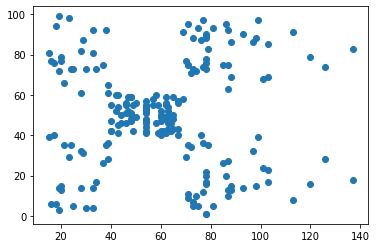

In [11]:
a = df.iloc[:,2]
b = df.iloc[:,3]
plt.scatter(a,b)
plt.show()

# modelling

In [12]:
X = df.iloc[:, [2,3]].values

In [13]:
from sklearn.cluster import DBSCAN

In [14]:
dbs = DBSCAN(eps = 2 , min_samples = 5)

# DBSCAN Clustering Model 

In [15]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN(eps = 2 , min_samples = 5)
y_dbs = dbs.fit_predict(X)

In [16]:
y_dbs

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0,  0, -1,  0, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  1, -1,  1,  1, -1, -1, -1,  1, -1,  1,  2,
       -1, -1, -1,  1,  2,  2,  1,  2, -1, -1,  1, -1,  2, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

# visualization of scatterplot

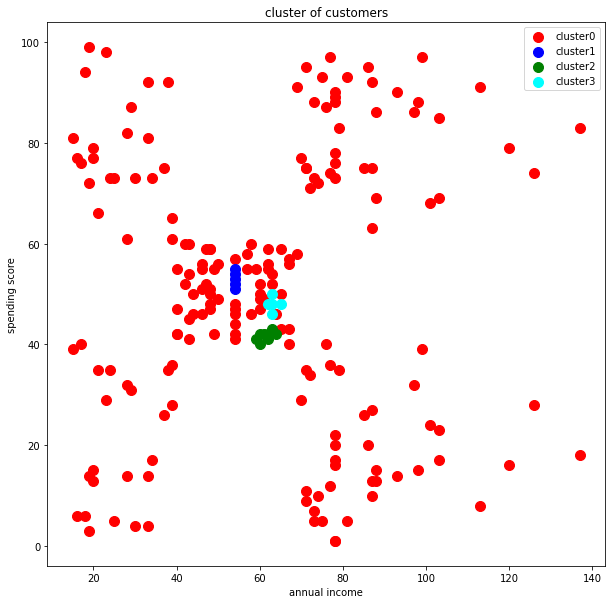

In [17]:
# plt.savefig('subplot.jpg')

plt.figure(1,figsize=(10,10))

plt.scatter(X[y_dbs==-1,0], X[y_dbs ==-1,1],s = 100 ,c = 'red', label = 'cluster0')

plt.scatter(X[y_dbs==0,0], X[y_dbs ==0,1],s = 100 ,c = 'blue', label = 'cluster1')

plt.scatter(X[y_dbs==1,0], X[y_dbs ==1,1],s = 100 ,c = 'green', label = 'cluster2')

plt.scatter(X[y_dbs==2,0], X[y_dbs ==2,1],s = 100 ,c = 'cyan', label = 'cluster3')



plt.title('cluster of customers')
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.legend()
plt.show()

In [18]:
df['cluster'] = pd.DataFrame(y_dbs)

In [19]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,Male,19,15,39,-1
1,Male,21,15,81,-1
2,Female,20,16,6,-1
3,Female,23,16,77,-1
4,Female,31,17,40,-1
...,...,...,...,...,...
195,Female,35,120,79,-1
196,Female,45,126,28,-1
197,Male,32,126,74,-1
198,Male,32,137,18,-1


In [21]:
cluster_1 = df[df['cluster']==-1]
cluster0 = df[df['cluster']==0]
cluster1 = df[df['cluster']==1]
cluster2 = df[df['cluster']==2]

In [22]:
c=pd.crosstab(df.Genre,df.cluster,margins = True)
c

cluster,-1,0,1,2,All
Genre,,,,,
Female,102,2,5,3,112
Male,80,3,3,2,88
All,182,5,8,5,200


<AxesSubplot:xlabel='Genre'>

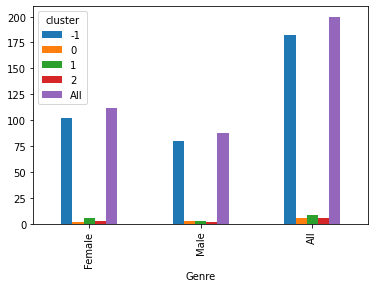

In [23]:
c.plot(kind='bar',stacked=False)


In [24]:
pd.crosstab(df.Age,df.cluster,margins = True)

cluster,-1,0,1,2,All
Age,,,,,
18,2,0,1,1,4
19,8,0,0,0,8
20,5,0,0,0,5
21,4,0,1,0,5
22,3,0,0,0,3
23,4,1,1,0,6
24,4,0,0,0,4
25,3,0,0,0,3
26,1,1,0,0,2


In [25]:
pd.crosstab(df['Annual Income (k$)'],df.cluster,margins = True)

cluster,-1,0,1,2,All
Annual Income (k$),,,,,
15,2,0,0,0,2
16,2,0,0,0,2
17,2,0,0,0,2
18,2,0,0,0,2
19,4,0,0,0,4
...,...,...,...,...,...
113,2,0,0,0,2
120,2,0,0,0,2
126,2,0,0,0,2


In [26]:
g=df.groupby('cluster').mean()
g

,Age,Annual Income (k$),Spending Score (1-100)
cluster,,,
-1,38.681319,60.631868,50.56044
0,37.800000,54.000000,53.00000
1,36.000000,61.375000,41.62500
2,50.600000,63.200000,48.00000


<AxesSubplot:xlabel='cluster'>

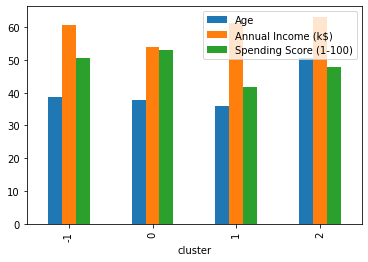

In [27]:
g.plot(kind='bar',stacked=False)

In [ ]:
cluster_1.to_csv('cluster_1.csv')